# Some Distributions


http://jiffyclub.github.io/scipy/tutorial/stats.html

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

- Main Distributions
- 
 

In [50]:
import scipy.stats
from scipy.stats import t, f, chi2, binom
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)}) # activates seaborn over matplotlib
# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html


In [51]:
# Create normal distributed samples
x = np.random.normal(1.78, 0.23, 1000)
y = np.random.normal(1.62, 0.17, 1000)

# calculate Arithmetic mean of sample
n = x.shape[0]
xbar = 1 / n * np.sum(x) 
ybar = 1 / n * np.sum(y) 
print("xbar: ", xbar)
print("ybar: ", ybar)

# calculate Variance of sample
xvar = 1 / ( n - 1 ) * np.sum( (x-xbar) ** 2 ) # Hurrraaayyy for Broadcasting!
xdev = np.sqrt(xvar)
yvar = 1 / ( n - 1 ) * np.sum( (y-ybar) ** 2 ) # Hurrraaayyy for Broadcasting!
ydev = np.sqrt(yvar)
print("xvar: ", xvar)
print("xdev: ", xdev)
print("yvar: ", yvar)
print("ydev: ", ydev)

# calculate covariance
xycov = 1 / ( n -1 ) * np.sum( ( x - xbar ) * ( y - ybar ) )
print("xycov: ", xycov)

# implemented functions:
print()
print("Mean x: ", np.mean(x))
print("Var x: ", np.var(x))
print("StdDev x: ", np.std(x))

print("Mean y: ", np.mean(y))
print("Var y: ", np.var(y))
print("StdDev y: ", np.std(y))

xbar:  1.7783476541711913
ybar:  1.6236990476724262
xvar:  0.05291319463056004
xdev:  0.23002868219106948
yvar:  0.030708745515268105
ydev:  0.17523910954826297
xycov:  0.0019863818680536114

Mean x:  1.7783476541711913
Var x:  0.05286028143592948
StdDev x:  0.22991363908200288
Mean y:  1.623699047672426
Var y:  0.030678036769752837
StdDev y:  0.17515146807764084


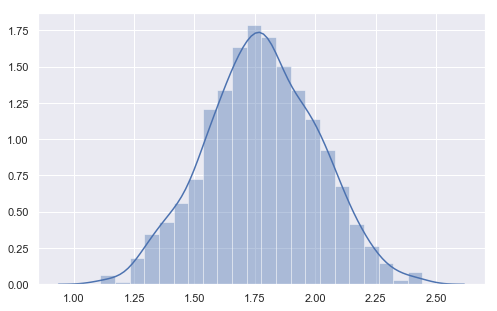

In [52]:
# ax = plt.hist(y)
ax2 = sns.distplot(x)

## Main Distributions



#### Discrete Binomial Distribution

Mean: 6.800000000000001 Var: 4.08 Skewness: 0.0990147542976674 Kurtosis: -0.107843137254902


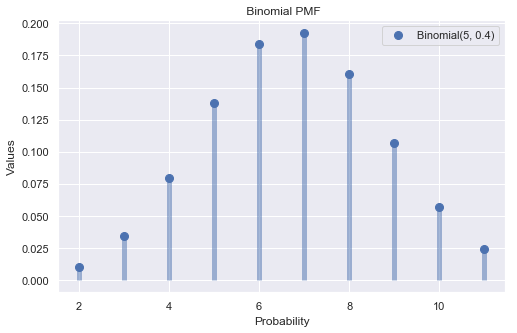

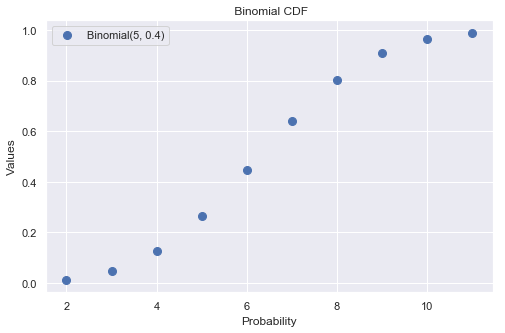

In [53]:
# Binomial Distribution
fig, ax = plt.subplots(1, 1)


# Calculate a few first moments
n, p = 17, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print("Mean:",mean, "Var:", var, "Skewness:",skew, "Kurtosis:", kurt) # skew = schiefe/assymmerie;  kurtosis = wielbung

# probability mass function (pmf) = Wahrscheinlichkeitsfunktion
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial(5, 0.4)')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel("Probability")
plt.ylabel("Values")
plt.legend()
plt.title(' Binomial PMF')
plt.show()

# check accuracy of cdf and ppf:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))
plt.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='Binomial(5, 0.4)')
plt.xlabel("Probability")
plt.ylabel("Values")
plt.legend()
plt.title(' Binomial CDF')
plt.show()
# 





#### Normal Distribution

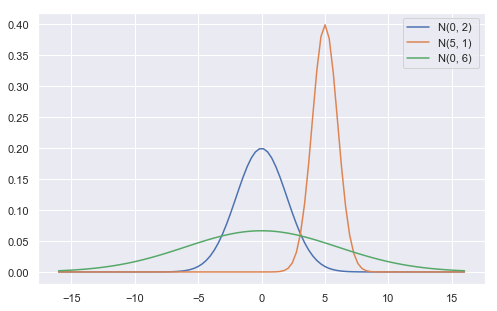

In [54]:
mu = 0 # mean
variance = 4 #variance
sigma = np.sqrt(variance)
x = np.linspace(mu-4*variance, mu+4*variance, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), label = 'N(0, 2) ') # PDF probability density function 
plt.plot(x, scipy.stats.norm.pdf(x, 5, 1), label = 'N(5, 1) ') 
plt.plot(x, scipy.stats.norm.pdf(x, 0, 6), label = 'N(0, 6) ') 
plt.legend()

#### Chi-Square-Distribution

Text(0.5, 1.0, ' Chi-Square-Distributions')

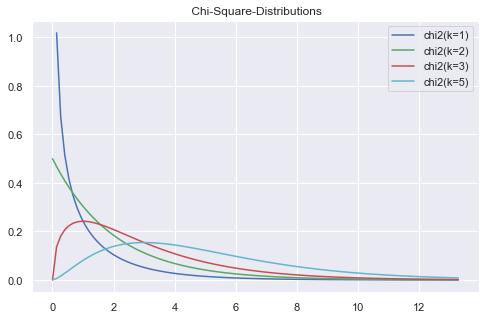

In [55]:
n = 4
# print(scipy.stats.chi2.ppf(0.01, n))
x = np.linspace(scipy.stats.chi2.ppf(0, n), scipy.stats.chi2.ppf(0.99 ,n), 100)
plt.plot(x, scipy.stats.chi2.pdf(x, 1), 'b-', label = 'chi2(k=1)')
plt.plot(x, scipy.stats.chi2.pdf(x, 2), 'g-', label = 'chi2(k=2)')
plt.plot(x, scipy.stats.chi2.pdf(x, 3), 'r-', label = 'chi2(k=3)')
plt.plot(x, scipy.stats.chi2.pdf(x, 5), 'c-', label = 'chi2(k=5)')
plt.legend()
plt.title(' Chi-Square-Distributions')

####  F-Distribution

CDF - proba_at_f_inf_3:  0.9064635296566765
PPF - f_at_proba_inf_95:  4.170876785766691
SF - f_at_proba_sup_3:  0.09353647034332341
p-value (P<0.05):  [4.18181818 4.22727273 4.27272727 4.31818182 4.36363636 4.40909091
 4.45454545 4.5        4.54545455 4.59090909 4.63636364 4.68181818
 4.72727273 4.77272727 4.81818182 4.86363636 4.90909091 4.95454545
 5.        ]


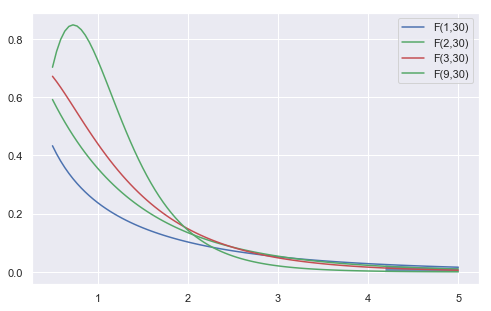

In [56]:
fvalues = np.linspace(0.5, 5, 100)

# pdf(x, df1, df2): Propability density function of F.
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 1, 30), 'b-', label = "F(1,30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 2, 30), 'g-', label = "F(2,30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 3, 30), 'r-', label = "F(3,30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 9, 30), 'g-', label = "F(9,30)")
plt.legend() # else no legend!

# cdf(x, df1, df2): Cumulative distribution function of F.
proba_at_f_inf_3 = scipy.stats.f.cdf(3, 1, 30)
print("CDF - proba_at_f_inf_3: ", proba_at_f_inf_3)

# ppf(q, df1, df2) percent point function  (inverse of cdf) at q of F.
f_at_proba_inf_95 = scipy.stats.f.ppf(0.95, 1, 30) # q such P(F(1,39) < 95)
assert scipy.stats.f.cdf(f_at_proba_inf_95, 1, 30) == 0.95, "Error: P(F(1,39) < 95 NOT satisfied!"
print("PPF - f_at_proba_inf_95: ", f_at_proba_inf_95)

# sf(): Survival function: (1-cdf) at x of F.     (complementary cumulative distribution function)
f_at_proba_sup_3 = scipy.stats.f.sf(3, 1, 30)
assert f_at_proba_sup_3 + proba_at_f_inf_3 == 1
print("SF - f_at_proba_sup_3: ", f_at_proba_sup_3)

# p-value: P(F(1,30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, scipy.stats.f.pdf(low_proba_fvalues,1,30), alpha = 0.8, label='P<0.05')
print('p-value (P<0.05): ', low_proba_fvalues)

**Students t-distribution**

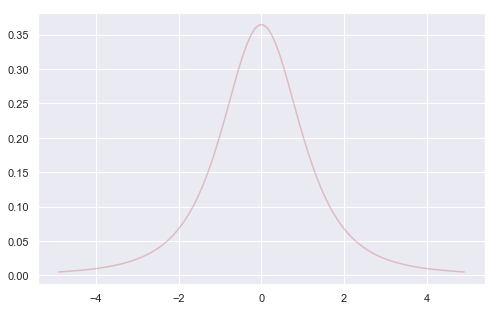

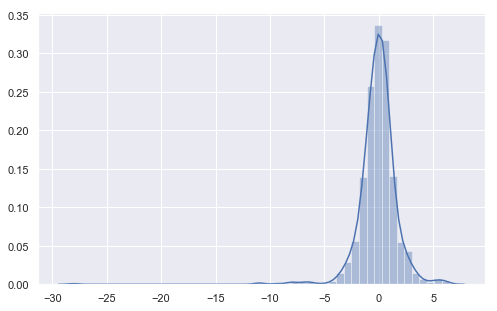

In [61]:
fig, axs = plt.subplots(1, 1)

# PDF (user ppf to calculate x values)
df = 2.74
x = np.linspace(scipy.stats.t.ppf(0.01, df), scipy.stats.t.ppf(0.99, df), 100)
plt.plot(x, scipy.stats.t.pdf(x, df), 'r-', alpha = 0.3, label = 't-student')
plt.show()

# check connection between CDF and PPF
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

# generate random variables
r_t = t.rvs(df, size = 1000)
fig = sns.distplot(r_t)
plt.show()